<a href="https://colab.research.google.com/github/ucfilho/Metodos_Numericos_2021/blob/main/Mod_02_Class_12_ajuste_Clausius_Clapeyron_BFGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy  as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
def Minimo(x):
  A = x[0]
  B = x[1]
  P = [1,5,10,20,40,60,100,200,400,760]
  T = [-36.7,-19.6,-11.5,-2.6,7.6,15.4,26.1,42.2,60.6,80.1]
  Num =10 # Num = len(P)
  Soma = 0

  for i in range(Num):
    TC = T[i]
    Pcal = np.exp((A - B/ (TC+273.15)))
    Ptrue = P[i]
    Soma = Soma + (Ptrue-Pcal)**2

  return Soma

In [ ]:
x0=np.array([1,1,1]) # initial guess of x
# Resultado = minimize(Minimo, x0, method='BFGS',options={'gtol': 1e-10, 'disp': True})
Resultado = minimize(Minimo, x0, method='Nelder-Mead',options={'gtol': 1e-10, 'disp': True, 'maxiter': 1000})

Optimization terminated successfully.
         Current function value: 103.754841
         Iterations: 209
         Function evaluations: 379


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: OptimizeWarning: Unknown solver options: gtol
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print('fun=',Resultado.fun)
print('resposta=',Resultado.x)

fun= 103.7548410829576
resposta= [  17.84618431 3960.0183727  5937.02170605]


In [ ]:
Resultado.x

array([  17.84618431, 3960.0183727 , 5937.02170605])

In [ ]:
w = Resultado.x
A = w[0]
B = w[1]
C = w[2]
Pcalc = []

# A, B, C = Resultado.x
P = [1,5,10,20,40,60,100,200,400,760]
T = [-36.7,-19.6,-11.5,-2.6,7.6,15.4,26.1,42.2,60.6,80.1]
Num =10

for i in range(Num):
  TC =T[i]
  Pi = np.exp((A - B/ (TC+273.15)))
  Pcalc.append(Pi)


(0.0, 800.0)

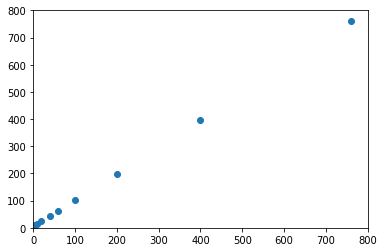

In [ ]:
plt.scatter(P,Pcalc)
plt.xlim([0,800])
plt.ylim([0,800])

In [ ]:
pd.DataFrame({'Ptrue':P,'Pcalc':Pcalc})

,Ptrue,Pcalc
0,1,2.999303
1,5,9.280270
2,10,15.050213
3,20,24.760894
4,40,42.141929
5,60,61.702797
6,100,100.790107
7,200,198.075888
8,400,395.820460
9,760,761.995933
